In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'config'

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [5]:
# Perform API call
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get latitude and temperature for cities

# set up lists to hold reponse info
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(city)
    try:
        city_response = requests.get(query_url + city).json()
    except Exception as e:
        print(e)
    try:
        lat.append(city_response['coord']['lat'])
    except Exception as e: 
        print(e)
        lat.append('NaN')
    try:
        lng.append(city_response['coord']['lon'])
    except Exception as e: 
        print(e)
        lng.append('NaN')
    try:
        temp.append(city_response['main']['temp'])
    except Exception as e:
        print(e)
        temp.append('NaN')
    try:
        max_temp.append(city_response['main']['temp_max'])
    except Exception as e:
        print(e)
        max_temp.append('NaN')
    try:
        humidity.append(city_response['main']['humidity'])
    except Exception as e:
        print(e)
        humidity.append('NaN')
    try:
        cloudiness.append(city_response['clouds']['all'])
    except Exception as e:
        print(e)
        cloudiness.append('NaN')
    try:
        windspeed.append(city_response['wind']['speed'])
    except Exception as e:
        print(e)
        windspeed.append('NaN')
    time.sleep(1)
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

hobart
doha
bengkulu
port hardy
taloqan
port-gentil
kruisfontein
kodiak
avarua
mar del plata
hamilton
mataura
ati
mahebourg
lebu
ancud
hihifo
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
kadykchan
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
severo-kurilsk
new norfolk
atuona
duz
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
nanortalik
taolanaro
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
barentsburg
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
punta arenas
foumbot
gweta
albion
esperance
georgetown
kavaratti
pevek
talcahuano
jamestown
praya
atar
vaini
port elizabeth
vaitupu
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
hermanus
sur
busselton
corum
ushuaia
hithadhoo
beloha
namibe
la palma
hilo
kerema
velestinon
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
bluff
carnarvon
yenagoa
great bend
mongo
joue-les-tours
ayan
rikitea
saldanha
cherskiy
kloulklubed
vilhena
mareeba
bara
careiro da varzea
cape town
lima
sungaipenuh
yellowknife
musw

In [6]:
# Convert raw data to data frame

data_dict = {'City': cities,
             'Latitude': lat,
             'Longitude': lng,
             'Temperature': temp,
             'Maximum Temperature': max_temp,
             'Humidity': humidity,
             'Cloudiness': cloudiness,
             'Windspeed': windspeed}

cities_df = pd.DataFrame(data_dict)
cities_df = cities_df.replace('NaN', np.NaN)
cities_df = cities_df.dropna()

# Saving for VacationPy
cities_df.to_csv('cities.csv', index=False)

cities_df.head()

,City,Latitude,Longitude,Temperature,Maximum Temperature,Humidity,Cloudiness,Windspeed
0,hobart,-42.88,147.33,58.39,60.01,71.0,57.0,9.17
1,doha,25.29,51.53,69.26,69.80,83.0,40.0,4.70
2,bengkulu,-3.80,102.27,79.41,79.41,79.0,87.0,4.85
3,port hardy,50.70,-127.42,55.40,55.40,54.0,75.0,5.82
4,taloqan,36.74,69.53,56.41,56.41,66.0,100.0,2.89


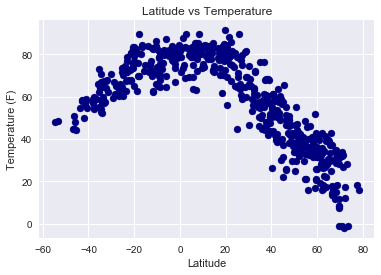

In [3]:
# Latitude vs. Temperature Plot

plt.scatter(cities_df['Latitude'], cities_df['Temperature'], color='navy')
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('LatvsTemp.png', bbox_inches='tight')
plt.show()

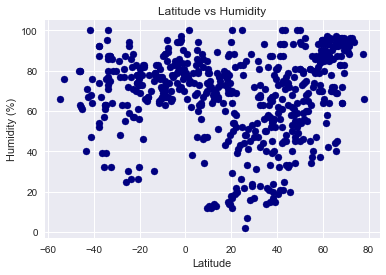

In [4]:
# Latitude vs. Humidity Plot
plt.scatter(cities_df['Latitude'], cities_df['Humidity'], color='navy')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('LatvsHumid.png', bbox_inches='tight')
plt.show()

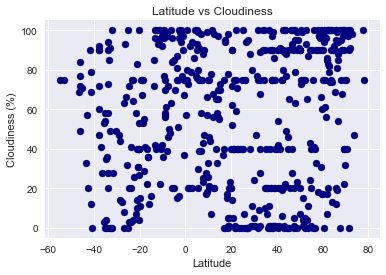

In [5]:
# Latitude vs. Cloudiness Plot
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'], color='navy')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('LatvsCloud.png', bbox_inches='tight')
plt.show()

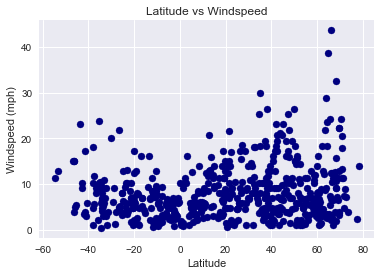

In [7]:
# Latitude vs. Wind Speed Plot
plt.scatter(cities_df['Latitude'], cities_df['Windspeed'], color='navy')
plt.title('Latitude vs Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.savefig('LatvsWind.png', bbox_inches='tight')
plt.show()

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
 
def regressplot(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f'{title}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    # Print r square value
    print(f"The r is: {rvalue}")
    return


The r is: 0.11685720120648856


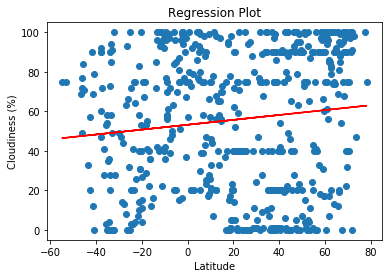

In [12]:
regressplot(cities_df['Latitude'], cities_df['Cloudiness'], 'Regression Plot', 'Latitude', 'Cloudiness (%)')

In [8]:
# Create Northern and Southern Hemisphere DataFrames

cities_north = cities_df.loc[cities_df['Latitude'] > 0]
cities_south = cities_df.loc[cities_df['Latitude'] < 0]


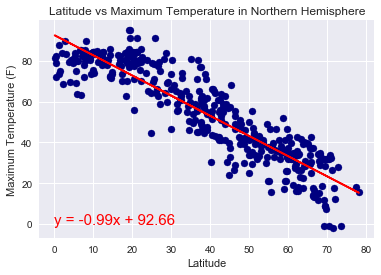

The r is: -0.9036373892249613


In [9]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Maximum Temperature'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Maximum Temperature'], color='navy')
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Maximum Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.savefig('LatvsMaxTempRegressN.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


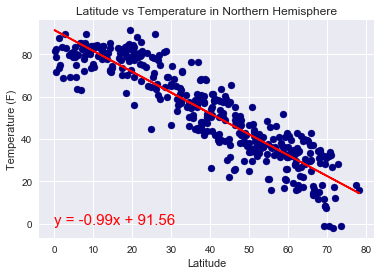

The r is: -0.911232892958197


In [10]:
# Northern Hemisphere - Temp vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Temperature'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Temperature'], color='navy')
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.savefig('LatvsTempRegressN.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


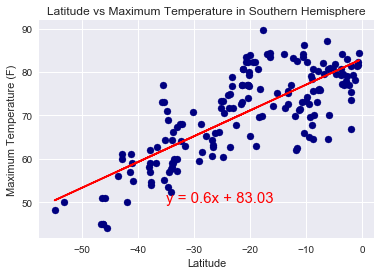

The r is: 0.7683064630289869


In [11]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Maximum Temperature'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Maximum Temperature'], color='navy')
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Maximum Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.savefig('LatvsMaxTempRegressS.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


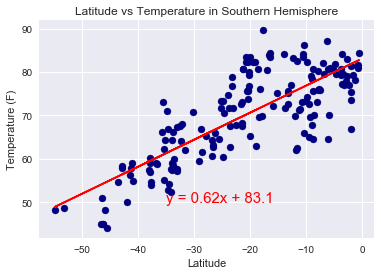

The r is: 0.7947357924262921


In [12]:
# Southern Hemisphere - Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Temperature'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Temperature'], color='navy')
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.savefig('LatvsTempRegressS.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


In [ ]:
###Inference

#Temperature decreases as we move away from the equator (latitude 0)


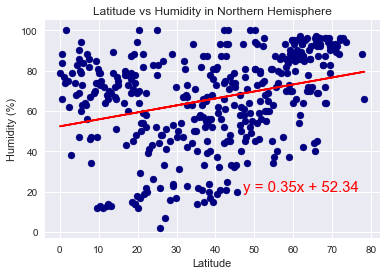

The r is: 0.3065725370285425


In [13]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Humidity'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Humidity'], color='navy')
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Humidity in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(47,20),fontsize=15,color="red")
plt.savefig('LatvsHumidRegressN.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


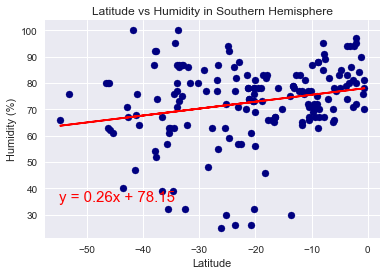

The r is: 0.2318476137090594


In [14]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Humidity'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Humidity'], color='navy')
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.savefig('LatvsHumidRegressS.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


In [ ]:
###Inference

#Humidity seems to weakly increase as we move north, and not as a function of distance from the equator.


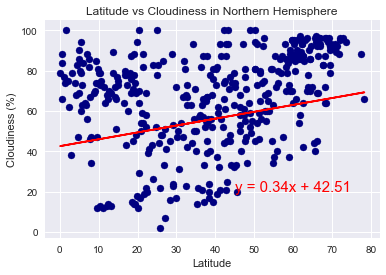

The r is: 0.19234335761819435


In [15]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Cloudiness'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Humidity'], color='navy')
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Cloudiness in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.savefig('LatvsCloudRegressN.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


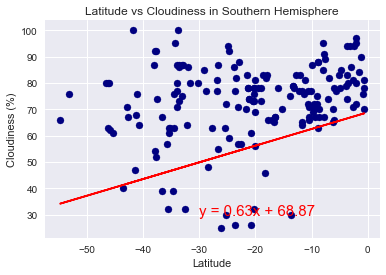

The r is: 0.2641922890589229


In [16]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Cloudiness'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Humidity'], color='navy')
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.savefig('LatvsCloudRegressS.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


In [ ]:
###Inference

#Cloudiness seems to increase as we move north, and not as a function of distance from the equator.
#This could be because the North has more landmass, and therefore more trees, which are important in the creation of clouds.


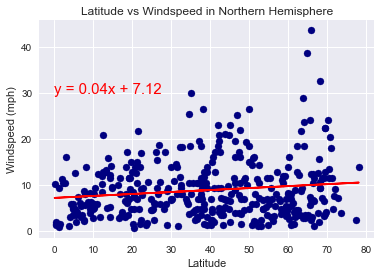

The r is: 0.13819052576479796


In [17]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Windspeed'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Windspeed'], color='navy')
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Windspeed in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.savefig('LatvsWindRegressN.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


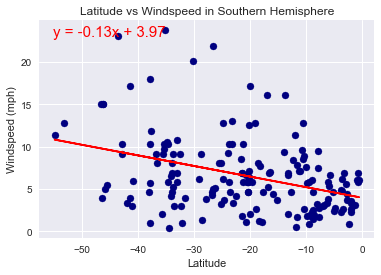

The r is: -0.37486435553637565


In [18]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Windspeed'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Windspeed'], color='navy')
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Windspeed in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")
plt.savefig('LatvsWindRegressS.png', bbox_inches='tight')
plt.show()
print(f"The r is: {rvalue}")


In [ ]:
###Inference

#Windspeed seems to increase as we move away from the equator, though this increase is much less in the Northern hemisphere than in the Southern
#While the regression coefficient is small and it is possible this relationship is not reliably predictive, 
#one reason why wind speeds increase more in the South may be because the North has more landmass as we move towards the pole while the South has more sea, amplifying windspeeds
